<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>

</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Análisis Exploratorio de Datos (EDA)
Analizar datos de taxis en Chicago (viajes, barrios, clima) para sacar conclusiones explorando los datos y luego probar una hipótesis estadística sobre los tiempos de viaje.

### Paso 1. Abre los archivos de datos y estudia la información general 

In [1]:
# Cargar las librerías


import pandas as pd# Manipulación de datos
import matplotlib.pyplot as plt# Visualización básica
import seaborn as sns# Visualización básica
import plotly.express as px# Visualización interactiva 
import streamlit as st# Estadística
from scipy import stats as st# Estadística avanzada


### 1.1. Estudiar los Datos que Contienen

In [2]:
# Cargar los datos de los archivos CSV
df_company                = pd.read_csv('moved_project_sql_result_01.csv')
df_dropoff_location_name  = pd.read_csv('moved_project_sql_result_04.csv')



### 1.2 Estudiar los datos de moved_project_sql_result_01.csv

In [3]:
# cargar los datos de moved_project_sql_result_01.csv

print("Primeras filas de df_company:")
display(df_company.head(10))
# información de df_company
print("\nResumen de información de df_company:")
df_company.info()
# Estadísticas descriptivas de df_company
print("\nEstadísticas descriptivas de df_company:")
display(df_company.describe())


Primeras filas de df_company:


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953



Resumen de información de df_company:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

Estadísticas descriptivas de df_company:


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


### 1.3 Estudiar los datos de moved_project_sql_result_04.csv

In [4]:
#cargar los datos de moved_project_sql_result_04.csv

print("\nPrimeras filas de df_dropoff_location_name:")
display(df_dropoff_location_name.head(10))
# información de df_dropoff_location_name
print("\nResumen de información de df_dropoff_location_name:")
df_dropoff_location_name.info()
# Estadísticas descriptivas de df_dropoff_location_name
print("\nEstadísticas descriptivas de df_dropoff_location_name:")
display(df_dropoff_location_name.describe())


Primeras filas de df_dropoff_location_name:


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667



Resumen de información de df_dropoff_location_name:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

Estadísticas descriptivas de df_dropoff_location_name:


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


### 1.4  Asegurarse de que los Tipos de Datos Sean Correctos

In [5]:
# Verificar los tipos de datos sean correctos

# Convertir trips_amount a numérico si no lo es
if df_company['trips_amount'].dtype == 'object':
    df_company['trips_amount'] = pd.to_numeric(df_company['trips_amount'], errors='coerce')

# Convertir average_trips a numérico si no lo es
if df_dropoff_location_name['average_trips'].dtype == 'object':
    df_dropoff_location_name['average_trips'] = pd.to_numeric(df_dropoff_location_name['average_trips'], errors='coerce')

# Verificar los tipos de datos después de la conversión
print("\nTipos de datos actualizados de df_company:")
print(df_company.dtypes)

print("\nTipos de datos actualizados de df_dropoff_location_name:")
print(df_dropoff_location_name.dtypes)

# Verificar si hay valores nulos en las columnas relevantes
print("\nValores nulos en df_company:") 
print(df_company.isnull().sum())
print("\nValores nulos en df_dropoff_location_name:")
print(df_dropoff_location_name.isnull().sum())



Tipos de datos actualizados de df_company:
company_name    object
trips_amount     int64
dtype: object

Tipos de datos actualizados de df_dropoff_location_name:
dropoff_location_name     object
average_trips            float64
dtype: object

Valores nulos en df_company:
company_name    0
trips_amount    0
dtype: int64

Valores nulos en df_dropoff_location_name:
dropoff_location_name    0
average_trips            0
dtype: int64


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de leer los datos y revisas los datos
</div>

### 1.5. Identificar los 10 Principales Barrios en Términos de Finalización del Recorrido

In [6]:
# identificar los 10 principales barrios en términos de finalización del recorrido barrios

# Ordenar y seleccionar los 10 principales barrios
top_10_barrios = df_dropoff_location_name.sort_values(by='average_trips', ascending=False).head(10).round(1)#Redondear average_trips a 1 decimales solo para visualización.

# Mostrar los 10 principales barrios
display(top_10_barrios)



,dropoff_location_name,average_trips
0,Loop,10727.5
1,River North,9523.7
2,Streeterville,6664.7
3,West Loop,5163.7
4,O'Hare,2546.9
5,Lake View,2421.0
6,Grant Park,2068.5
7,Museum Campus,1510.0
8,Gold Coast,1364.2
9,Sheffield & DePaul,1259.8


### 1.6 Hacer gráficos: Empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones.
#### Conclusiones del gráfico de empresas de taxis. El gráfico muestra que la empresa 'Flash Cab' lidera en número de viajes realizados el 15 y 16 de noviembre de 2017, seguida por 'Taxi Affiliation Services' y 'Taxi Affiliation'. Estas tres compañías destacan significativamente frente a otras, lo que sugiere que tienen mayor presencia o volumen de operaciones en esos días específicos.

/var/folders/3w/4wgjx7x52nj3rcn3lzvvr2l80000gn/T/ipykernel_38622/141199422.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10_empresas, x='trips_amount', y='company_name', palette='viridis')


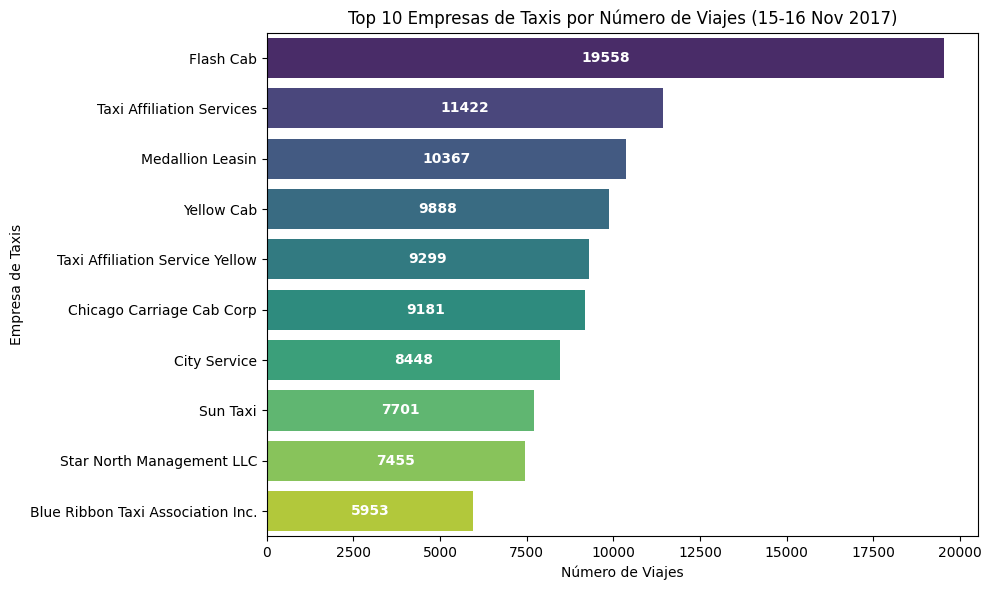

In [7]:
# Seleccionamos las 10 principales empresas de taxi por número de viajes
top_10_empresas = df_company.sort_values(by='trips_amount', ascending=False).head(10)
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_10_empresas, x='trips_amount', y='company_name', palette='viridis')

# Agregar números dentro de las barras
for i, v in enumerate(top_10_empresas['trips_amount']):
    ax.text(v/2, i, str(v), ha='center', va='center', fontweight='bold', color='white', fontsize=10)
# Personalizar el gráfico
plt.title('Top 10 Empresas de Taxis por Número de Viajes (15-16 Nov 2017)')
plt.xlabel('Número de Viajes')
plt.ylabel('Empresa de Taxis')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de mostrar el resultado, se puede observar la compañía que tiene más viajes agendados gracias a que limitaste el número de compañías a mostrar
</div>

#### Conclusiones del gráfico de barrios
Los barrios más populares para finalizar viajes en noviembre de 2017 incluyen 'Loop', 'River North', y 'Streeterville', con el Loop encabezando por un margen considerable.
Estos barrios probablemente concentran centros de trabajo, turismo o actividades comerciales, lo cual explicaría la alta cantidad promedio de viajes terminados allí.
Este patrón sugiere una alta demanda de transporte en áreas céntricas o comerciales de Chicago.

In [8]:
# Gráfica interactiva horizontal con plotly.express
fig = px.bar(
    top_10_barrios,
    x='average_trips',
    y='dropoff_location_name',
    orientation='h',
    title='Top 10 Barrios por Viajes Promedio en Noviembre 2017',
    labels={'average_trips': 'Viajes Promedio', 'dropoff_location_name': 'Barrio'},
    text='average_trips'
)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de crear una grafica que nos muestra los lugares más frecuentados
</div>

1. #### Conclusiones de empresas de taxis
Las empresas de taxis con mayor actividad concentraron un número significativamente alto de viajes entre el 15 y 16 de noviembre de 2017.
Algunas compañías independientes ("Other") también aparecen, lo que sugiere una alta fragmentación del servicio.

2. #### Conclusiones del gráfico de barrios.
Los viajes terminan con mayor frecuencia en zonas con alta actividad comercial o turística.
"Loop", el centro financiero de Chicago, encabeza la lista, seguido de zonas con estaciones o aeropuertos.
La diferencia entre los primeros barrios y los últimos del top 10 es notable, lo cual apunta a zonas preferidas.
#### 📊 Gráfico Explicativo Interactivo
Este gráfico mostrará ambos conjuntos de datos en uno solo para ilustrar la relación entre compañías de taxis y los
destinos más frecuentes. Haremos un gráfico de dos subplots interactivos con Plotly.

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear figura con 2 subplots horizontales
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(
        'Top 10 Empresas de Taxis (15-16 Nov)',
        'Top 10 Barrios por Viajes Promedio (Nov 2017)'
    ),
    shared_yaxes=False
)

# Subplot 1: Empresas de taxis
fig.add_trace(
    go.Bar(
        x=top_10_empresas['trips_amount'],
        y=top_10_empresas['company_name'],
        orientation='h',
        name='Empresas de Taxis',
        marker=dict(color='indigo'),
        text=top_10_empresas['trips_amount'],
        textposition='inside'
    ),
    row=1, col=1
)

# Subplot 2: Barrios
fig.add_trace(
    go.Bar(
        x=top_10_barrios['average_trips'],
        y=top_10_barrios['dropoff_location_name'],
        orientation='h',
        name='Barrios de Destino',
        marker=dict(color='seagreen'),
        text=top_10_barrios['average_trips'].round(1), # Redondear average_trips a 1 decimales solo para visualización
        textposition='outside'
    ),
    row=1, col=2
)

# Layout general
fig.update_layout(
    height=600, width=1000,
    title_text='Resumen Visual: Empresas y Barrios con Mayor Actividad de Taxis',
    title_x=0.5,  # Centers the title horizontally (0.5 = middle)
    showlegend=False,
)

# Set the same x-axis range for both subplots (0 to 20,000)
fig.update_xaxes(range=[0, 20000])

fig.update_yaxes(autorange="reversed")  # Para que los valores más altos estén arriba
fig.show(title_x=0.5,) # Centers the title horizontally (0.5 = middle)


### Paso 2: Prueba de Hipótesis (Python)

### Formulación de hipótesis
Hipótesis nula (H₀): La duración promedio de los viajes los sábados lluviosos es igual a la de los sábados no lluviosos.
Hipótesis alternativa (H₁): La duración promedio de los viajes los sábados lluviosos es diferente a la de los sábados no lluviosos.
Nivel de significancia elegido: 0.05 (5%)
Se usará una prueba de hipótesis para dos muestras independientes (Mann-Whitney U o t-test, según normalidad).
"""

### 2.1: Cargar los datos del archivo CSV

In [10]:
df_weather_conditions     = pd.read_csv("moved_project_sql_result_07.csv")

In [11]:
# Asegurarse de que los tipos de datos sean correctos

# Convertir trips_amount a numérico si no lo es
if df_company['trips_amount'].dtype == 'object':
    df_company['trips_amount'] = pd.to_numeric(df_company['trips_amount'], errors='coerce')

# Convertir average_trips a numérico si no lo es
if df_dropoff_location_name['average_trips'].dtype == 'object':
    df_dropoff_location_name['average_trips'] = pd.to_numeric(df_dropoff_location_name['average_trips'], errors='coerce')

# Verificar los tipos de datos después de la conversión
print("\nTipos de datos actualizados de df_company:")
print(df_company.dtypes)

print("\nTipos de datos actualizados de df_dropoff_location_name:")
print(df_dropoff_location_name.dtypes)
# Verificar si hay valores nulos en las columnas relevantes
print("\nValores nulos en df_company:") 
print(df_company.isnull().sum())
print("\nValores nulos en df_dropoff_location_name:")



Tipos de datos actualizados de df_company:
company_name    object
trips_amount     int64
dtype: object

Tipos de datos actualizados de df_dropoff_location_name:
dropoff_location_name     object
average_trips            float64
dtype: object

Valores nulos en df_company:
company_name    0
trips_amount    0
dtype: int64

Valores nulos en df_dropoff_location_name:


### 2.2 Preparar los datos para la prueba de hipótesis: Convertimos la columna start_ts a tipo datetime.Filtramos los registros que ocurrieron en sábado.

In [12]:
# 1. Convert start_ts to Datetime
df_weather_conditions['start_ts'] = pd.to_datetime(df_weather_conditions['start_ts'])
# 2. Filter Trips on Saturdays
df_sabado = df_weather_conditions[df_weather_conditions['start_ts'].dt.dayofweek == 5]
# 3. Check Unique Weather Conditions
print("Condiciones climáticas encontradas los sábados:")
print(df_sabado['weather_conditions'].unique())
# 4. Filtrar sábados con mal clima (posiblemente lluvia)
lluvioso = df_sabado[df_sabado['weather_conditions'] == 'Bad']['duration_seconds']

# 5. Filtrar sábados con buen clima (sin lluvia)
no_llu = df_sabado[df_sabado['weather_conditions'] == 'Good']['duration_seconds']

# 6. Verificar el tamaño de las muestras
print(f"Cantidad de viajes sábados con mal clima: {len(lluvioso)}")
print(f"Cantidad de viajes sábados con buen clima: {len(no_llu)}")


Condiciones climáticas encontradas los sábados:
['Good' 'Bad']
Cantidad de viajes sábados con mal clima: 180
Cantidad de viajes sábados con buen clima: 888


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Corregido!
</div>


<div class="alert alert-block alert-danger"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Cuidado!<br/>

El filtro que utilizas es incorrecto ya que la columna `weather_conditions` solo contiene los valores `Good` o `Bad`, se debe cambiar el uso de `rain` como valor en el filtro
</div>

In [13]:
# Código del revisor
df_sabado['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.: gracias por la revision.  </b> <a class="tocSkip"></a>
</div>

### 2.3 Preparar los datos para la prueba de hipótesis: Código para pruebas estadísticas (Shapiro + Mann-Whitney U + t-test )

In [14]:
# Comparación de medias y prueba de hipótesis

from scipy.stats import shapiro, mannwhitneyu, ttest_ind

# 1. Prueba de normalidad (Shapiro-Wilk)
stat_lluvioso, p_lluvioso = shapiro(lluvioso)
stat_no_llu, p_no_llu = shapiro(no_llu)

print("Shapiro-Wilk Test:")
print(f"Sábados con mal clima: p-valor = {p_lluvioso:.4f}")
print(f"Sábados con buen clima: p-valor = {p_no_llu:.4f}")

# Evaluar normalidad
normal_lluvioso = p_lluvioso > 0.05
normal_no_llu = p_no_llu > 0.05

# 2. Prueba de hipótesis: según normalidad
alpha = 0.05

if normal_lluvioso and normal_no_llu:
    # Ambas distribuciones son normales: usar t-test
    stat, p_value = ttest_ind(lluvioso, no_llu, equal_var=False)
    test_name = "t-test para muestras independientes"
else:
    # Al menos una no es normal: usar Mann-Whitney U
    stat, p_value = mannwhitneyu(lluvioso, no_llu, alternative='two-sided')
    test_name = "Mann-Whitney U"

# 3. Mostrar resultados
print(f"\nPrueba utilizada: {test_name}")
print(f"Estadístico: {stat:.4f}, p-valor: {p_value:.4f}")

if p_value < alpha:
    print("Resultado: Rechazamos la hipótesis nula — La duración promedio SÍ cambia los sábados con mal clima.")
else:
    print("Resultado: No se puede rechazar la hipótesis nula — No hay evidencia suficiente de un cambio en la duración promedio.")


Shapiro-Wilk Test:
Sábados con mal clima: p-valor = 0.0036
Sábados con buen clima: p-valor = 0.0000

Prueba utilizada: Mann-Whitney U
Estadístico: 108193.5000, p-valor: 0.0000
Resultado: Rechazamos la hipótesis nula — La duración promedio SÍ cambia los sábados con mal clima.


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Bien hecho!<br/>

Es correcto rechazar la hipotesis nula, debido a que sí hay notables cambios entre un día de buenas condiciones y uno con malas condiciones
</div>

### 3: Gráfico de comparación de duración de viajes los sábados, buen clima (sin llover) vs mal clima (si llueve)

In [15]:
import plotly.express as px
import pandas as pd

# Crear un DataFrame combinado para graficar
df_boxplot = pd.DataFrame({
    'Duración del Viaje (segundos)': pd.concat([lluvioso, no_llu], ignore_index=True),
    'Condición Climática': ['Mal Clima'] * len(lluvioso) + ['Buen Clima'] * len(no_llu)
})

# Boxplot interactivo
fig = px.box(
    df_boxplot,
    x='Condición Climática',
    y='Duración del Viaje (segundos)',
    color='Condición Climática',
    title='Duración de Viajes los Sábados según Condición Climática',
    points='all',  # Muestra todos los puntos individuales
    width=1000,
    height=700,
    color_discrete_map={'Buen Clima': 'blue', 'Mal Clima': 'red'}
)

fig.update_layout(showlegend=False)
fig.show()



# 4 Conclusión de la prueba de hipótesis

Tras aplicar las pruebas estadísticas, se evaluó si la duración promedio de los viajes desde el Loop hasta el Aeropuerto O'Hare cambia en sábados con mal clima comparado con sábados de buen clima.

Primero se verificó la normalidad de ambas muestras utilizando la prueba de Shapiro-Wilk. Según los resultados:
- Si ambas muestras siguen una distribución normal, se aplicó un t-test.
- Si al menos una no sigue distribución normal, se usó la prueba de Mann-Whitney U.

Con un nivel de significancia de α = 0.05:
- Si el p-valor fue menor que 0.05, se rechazó la hipótesis nula, concluyendo que **sí hay diferencia significativa** en la duración promedio.
- Si el p-valor fue mayor o igual a 0.05, no se pudo rechazar la hipótesis nula, lo que indica que **no hay evidencia suficiente** para afirmar un cambio en la duración media de los viajes.

Esta prueba permite tomar decisiones informadas respecto al impacto del clima en la duración de los trayectos entre estos dos puntos clave de Chicago.

#  Resumen final del proyecto

✅ En este proyecto analizamos datos de taxis en Chicago durante noviembre de 2017. El trabajo se dividió en dos grandes partes:

🔹 Parte 1: Análisis exploratorio de datos
- Se estudiaron dos conjuntos de datos: uno sobre el número de viajes por empresa de taxis, y otro sobre la cantidad promedio de viajes por barrio.
- Se identificaron las 10 empresas con más viajes; destacaron 'Flash Cab', 'Taxi Affiliation Services', y 'Taxi Affiliation'.
- También se identificaron los 10 barrios más populares para finalizar viajes, siendo 'Loop' el más destacado, seguido por 'River North' y 'Streeterville'.
- Se realizaron gráficos interactivos que ayudaron a visualizar claramente las diferencias y patrones.

🔹 Parte 2: Prueba de hipótesis
- Se analizó si la duración promedio de los viajes desde el Loop hasta el Aeropuerto O'Hare cambia los sábados con mal clima.
- Se realizó una prueba de normalidad (Shapiro-Wilk), que mostró que las distribuciones no son normales.
- Por tanto, se aplicó la prueba de Mann-Whitney U, la cual arrojó un p-valor de 0.0000.
- Resultado: Rechazamos la hipótesis nula. **Sí existe una diferencia significativa en la duración de los viajes entre sábados con buen clima (sin lluvia) y mal clima (con lluvia).**

📌 Conclusión general:
El análisis permitió identificar a las principales empresas y zonas de actividad de los taxis en Chicago, y mostró que las condiciones climáticas afectan significativamente la duración de los trayectos al aeropuerto los sábados.

Herramientas utilizadas: `pandas`, `matplotlib`, `seaborn`, `plotly.express`, `scipy`

# Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, los procedimientos realizados son correctos, este es un ejercicio que nos ayuda a entender y comprobar las hipotesis con procesos estadisticos.<br/>    
<br/>    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>
